<a href="https://colab.research.google.com/github/bhaveleena3/Python/blob/main/DecisionTree_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
company=pd.read_csv("/content/Company_Data.csv")

In [4]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [6]:
company['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [7]:
company['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [8]:
label_encoder = preprocessing.LabelEncoder() #encoding column
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

In [9]:
company['ShelveLoc']

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [10]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [11]:

x=company.iloc[:,1:11]
y=company['Sales']

In [12]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [13]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [14]:
#slpit data intoo Training and Testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)


In [15]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
92,114,113,0,97,125,2,29,12,1,0
223,110,45,9,276,125,2,62,14,1,1
234,115,62,11,289,129,1,56,16,0,1
232,137,80,10,24,105,1,61,15,1,1
377,132,61,0,263,125,2,41,12,0,0
...,...,...,...,...,...,...,...,...,...,...
323,107,105,18,428,103,2,34,12,1,1
192,108,26,0,408,93,2,56,14,0,0
117,145,53,0,507,119,2,41,12,1,0
47,126,98,0,173,108,0,55,16,1,0


In [16]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,125,87,9,232,136,1,72,10,1,1
309,131,111,13,33,80,0,68,18,1,1
341,98,120,0,268,93,2,72,10,0,0
196,130,28,6,410,133,0,72,16,1,1
246,120,56,20,266,90,0,78,18,1,1
...,...,...,...,...,...,...,...,...,...,...
216,141,33,0,243,144,2,34,17,1,0
259,123,36,10,467,100,0,74,11,0,1
49,157,93,0,51,149,1,32,17,1,0
238,121,24,0,200,133,1,73,13,1,0


In [17]:

y_train

92      4.53
223     3.45
234     9.43
232    13.14
377     6.81
       ...  
323    10.36
192     7.56
117     8.80
47      4.38
172     9.03
Name: Sales, Length: 280, dtype: float64

In [18]:
#Building model of decision tree using entropy criteria
from sklearn import utils
Model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
Model.fit(x_train,y_train.astype('int'))

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[5] <= 0.5\nentropy = 3.554\nsamples = 280\nvalue = [4, 2, 9, 15, 30, 37, 34, 38, 36, 21, 23, 12, 9\n6, 2, 1, 1]'),
 Text(0.25, 0.625, 'x[4] <= 102.5\nentropy = 3.164\nsamples = 71\nvalue = [3, 2, 6, 10, 14, 15, 6, 6, 5, 2, 1, 1, 0, 0\n0, 0, 0]'),
 Text(0.125, 0.375, 'x[1] <= 72.0\nentropy = 2.91\nsamples = 21\nvalue = [0, 0, 1, 3, 1, 2, 4, 3, 5, 1, 0, 1, 0, 0\n0, 0, 0]'),
 Text(0.0625, 0.125, 'entropy = 2.046\nsamples = 10\nvalue = [0, 0, 0, 3, 1, 0, 4, 1, 0, 1, 0, 0, 0, 0\n0, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 2.04\nsamples = 11\nvalue = [0, 0, 1, 0, 0, 2, 0, 2, 5, 0, 0, 1, 0, 0\n0, 0, 0]'),
 Text(0.375, 0.375, 'x[0] <= 144.0\nentropy = 2.824\nsamples = 50\nvalue = [3, 2, 5, 7, 13, 13, 2, 3, 0, 1, 1, 0, 0, 0\n0, 0, 0]'),
 Text(0.3125, 0.125, 'entropy = 2.487\nsamples = 43\nvalue = [2, 2, 5, 7, 13, 12, 0, 1, 0, 1, 0, 0, 0, 0\n0, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 2.236\nsamples = 7\nvalue = [1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0\n0, 0, 0]'),
 Text(0.

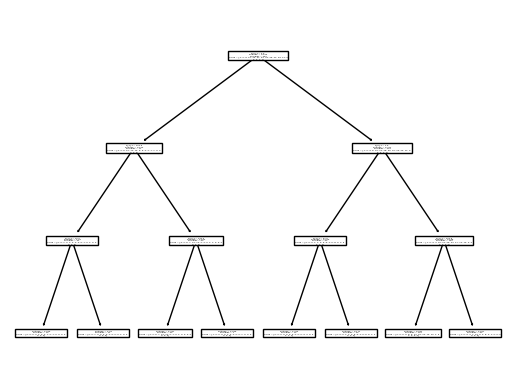

In [19]:
#plot decisionn Tree
tree.plot_tree(Model)

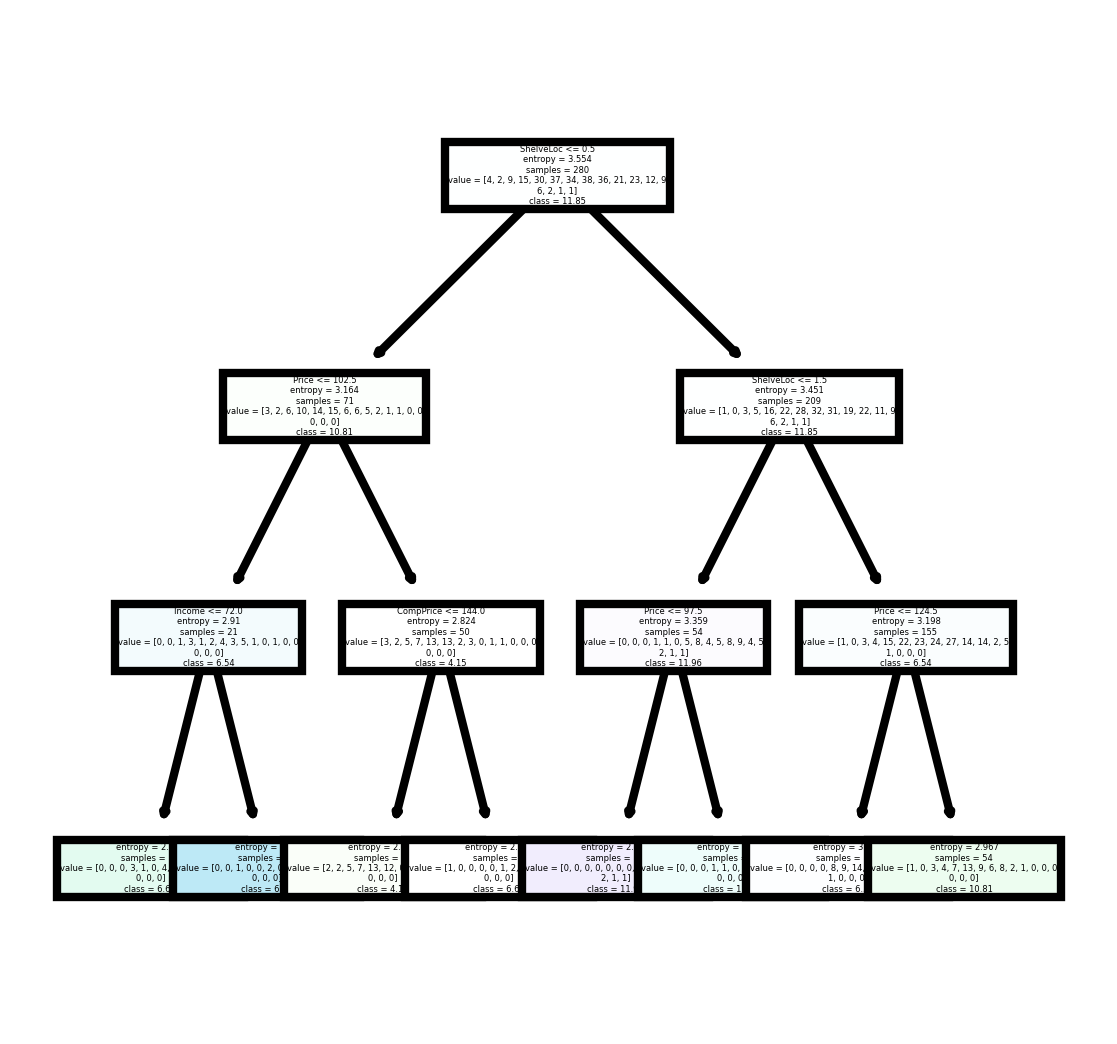

In [20]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=company['Sales'].astype('str')
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=600)
tree.plot_tree(Model,feature_names = fn,class_names=cn,filled = True);

In [21]:
#Predicting on test data
pred=Model.predict(x_test)
pd.Series(pred).value_counts()


8     48
7     27
5     22
4     13
6      6
11     4
dtype: int64

In [23]:
pred


array([ 7,  8,  8,  4,  6,  4,  8,  8,  4,  8,  8,  5,  4,  7,  5,  8, 11,
        5,  5,  5,  5,  8,  7,  7,  8,  8,  5,  5,  8,  8,  8,  8,  8,  6,
        5,  8,  8,  5,  8,  7,  8,  7,  8, 11,  4,  5,  8,  8,  7,  8,  4,
        7,  7,  8,  4,  7,  6,  8,  7,  4,  5, 11,  4,  5,  7,  5,  8,  8,
        8,  5,  7,  8,  7,  5,  8,  7,  7,  7,  8, 11,  4,  8,  5,  5,  8,
        8,  8,  8,  7,  8,  8,  8,  8,  8,  8,  4,  8,  8,  7,  7,  7,  8,
        4,  6,  8,  6,  7,  8,  5,  5,  7,  8,  7,  7,  5,  5,  6,  7,  7,
        4])

In [24]:
pd.crosstab(y_test,pred)

col_0,4,5,6,7,8,11
Sales,,,,,,
0.16,0,1,0,0,0,0
2.86,1,0,0,0,0,0
3.07,1,0,0,0,0,0
3.67,0,1,0,0,0,0
3.90,1,0,0,0,0,0
...,...,...,...,...,...,...
12.53,0,0,0,1,0,0
12.57,0,0,0,2,0,0
12.66,0,0,0,1,0,0


In [25]:
np.mean(pred==y_test) #accuracy

0.0

In [30]:
 from sklearn.metrics import accuracy_score #accuracy
 accuracy_score(y_test.astype('int'),pred)

0.18333333333333332

**By gini criteria**

In [31]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3)

In [33]:
model_gini.fit(x_train, y_train.astype('str'))

DecisionTreeClassifier(max_depth=3)

In [34]:
predi=model_gini.predict(x_test) #prediction
np.mean(predi==y_test)

0.0

In [37]:
 accuracy_score(y_test.astype('int'),predi)#accuracy

0.0

# **2nd Example Fraud check**

In [38]:
col_name=['Undergrad',	'Marital.Status','Taxable.Income',	'City.Population',	'Work.Experience',	'Urban']
fraud = pd.read_csv('/content/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [39]:
fraud['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [40]:
fraud['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [41]:
fraud['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [42]:
label_encoder = preprocessing.LabelEncoder()
fraud['Marital.Status'] = label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])

In [43]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [44]:
feature_col_name=['Undergrad'	,'Marital.Status','City.Population','Work.Experience','Urban']
x1=fraud[feature_col_name]
y1=fraud['Taxable.Income']

In [45]:
x1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [46]:
y1

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [49]:
# Spliting data into training and testing
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.3,random_state=0)

In [50]:
x1_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
378,1,0,152471,6,0
581,1,0,57473,10,1
447,0,1,166606,5,1
252,0,2,40855,28,1
561,0,1,36861,29,1
...,...,...,...,...,...
277,0,0,117364,11,0
9,1,0,155482,4,1
359,1,2,157299,11,0
192,1,1,126556,10,1


In [51]:
x1_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
434,1,2,87188,19,1
122,1,1,140762,26,0
224,0,1,55717,25,1
479,1,1,68995,21,0
205,0,1,131906,20,1
...,...,...,...,...,...
249,1,2,35376,0,1
357,0,1,84034,28,0
455,0,1,65533,23,1
493,0,1,103226,29,0


In [52]:
y1_train


378    36457
581    31085
447    83061
252    72382
561    50403
       ...  
277    63710
9      98152
359    33215
192    48313
559    72026
Name: Taxable.Income, Length: 420, dtype: int64

In [53]:
#Building Model
fraud_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3 )
fraud_model.fit(x1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

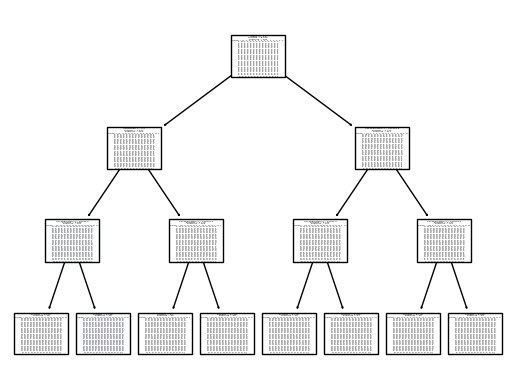

In [54]:
#plot decisionn Tree
tree.plot_tree(fraud_model,
               feature_names = feature_col_name,
               filled = True);

In [55]:
preds=fraud_model.predict(x1_test)#prediction
pd.Series(preds).value_counts()

10870    30
17440    28
59689    27
10329    26
10900    20
12470    18
10163    16
17783    15
dtype: int64

In [56]:
preds



array([12470, 10870, 17440, 10900, 10329, 17440, 10163, 17783, 10900,
       10163, 10870, 10870, 10329, 10870, 17783, 17440, 59689, 10329,
       17440, 10329, 10870, 12470, 10329, 10900, 10870, 10163, 10870,
       17783, 17783, 12470, 10900, 17440, 10870, 17440, 12470, 10329,
       59689, 17440, 10163, 10329, 10870, 10900, 12470, 59689, 17783,
       59689, 10163, 10329, 59689, 10900, 10900, 10870, 17440, 12470,
       59689, 10870, 10163, 17783, 10900, 10329, 10870, 10329, 59689,
       17440, 59689, 10870, 59689, 10163, 17440, 17440, 10329, 12470,
       10163, 10163, 10870, 10870, 59689, 59689, 17783, 17783, 17440,
       17440, 10329, 10900, 17440, 10329, 59689, 10870, 17440, 10329,
       12470, 10870, 17440, 17440, 59689, 10870, 10163, 59689, 10900,
       10163, 12470, 59689, 10900, 59689, 17440, 10329, 17783, 10870,
       12470, 17783, 12470, 59689, 10329, 59689, 17440, 10163, 10329,
       10329, 10870, 10163, 59689, 12470, 12470, 59689, 10900, 10900,
       17783, 10163,

In [57]:
pd.crosstab(y1_test,preds)

col_0,10163,10329,10870,10900,12470,17440,17783,59689
Taxable.Income,,,,,,,,
10003,0,0,0,0,0,1,0,0
10455,0,1,0,0,0,0,0,0
10735,0,0,0,0,1,0,0,0
10933,0,0,0,1,0,0,0,0
11794,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
98433,0,1,0,0,0,0,0,0
98588,0,0,0,0,0,0,0,1
98592,0,0,1,0,0,0,0,0


In [58]:
np.mean(preds==y1_test) # accuracy with mean()

0.0

In [61]:
#accuracy with accuracy_score()
 accuracy_score(y1_test,preds)

0.0

In [62]:
#Bulding model with gini method
gini_fraud = DecisionTreeClassifier(criterion = 'gini',max_depth=3)

In [63]:
gini_fraud.fit(x1_train,y1_train) #fitting model

DecisionTreeClassifier(max_depth=3)

In [64]:
pred_y=gini_fraud.predict(x1_test)
np.mean(pred_y==y1_test)# accuracy

0.0

# **DecisionTreeRegression**

In [65]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=1)

In [66]:
model_reg = DecisionTreeRegressor()
model_reg.fit(x1_train, y1_train)

DecisionTreeRegressor()

In [67]:
model_reg.score(x1_test,y1_test)

-1.086333290143422